In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

p1=-201
p2=199
B=0.01
N=10
h=B/N

In [11]:
A = np.array([[p1,p2],[p2,p1]])
np.linalg.inv(np.eye(2)+h*A)

array([[ 1.33433534, -0.33233133],
       [-0.33233133,  1.33433534]])

In [7]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
 
p1=-201
p2=199

u10 = 1
u20 = -2
def f1(u1,u2):
    return (p1*u1+p2*u2)
def f2(u1,u2):
    return (p2*u1+p1*u2)
def fi1(t):
    return ((1/2)*(u10+u20)*math.exp((p1+p2)*t)+(1/2)*(u10-u20)*math.exp((p1-p2)*t))
def fi2(t):
    return ((1/2)*(u10+u20)*math.exp((p1+p2)*t)-(1/2)*(u10-u20)*math.exp((p1-p2)*t))
B=0.1
N=100
h=B/N
pn = np.zeros(12)

#Гир
Emax4=1.1932703257921193
for j in range(12):
    N=25*(2**(j))
    h=B/N
    u1 = np.zeros(N+1)
    u2 = np.zeros(N+1)
    u1[0] = u10
    u2[0] = u20
    x = np.linspace(0, B, N+1)
    E4=np.zeros(N+1)
    for i in range(3):
        k11= h*f1(u1[i],u2[i])
        k21= h*f2(u1[i],u2[i])
        
        k12= h*f1(u1[i]+k11/2,u2[i]+k21/2)
        k22= h*f2(u1[i]+k11/2,u2[i]+k21/2)
        
        k13= h*f1(u1[i]+k12/2,u2[i]+k22/2)
        k23= h*f2(u1[i]+k12/2,u2[i]+k22/2)
        
        k14= h*f1(u1[i]+k13,u2[i]+k23)
        k24= h*f2(u1[i]+k13,u2[i]+k23)
        u1[i+1]= u1[i]+ (k11+2*k12+2*k13+k14)/6
        u2[i+1]= u2[i]+ (k21+2*k22+2*k23+k24)/6
        E4[i]=max([abs(fi1(x[i+1])-u1[i+1]),abs(fi2(x[i+1])-u2[i+1])])

    for i in range(N-3):
            u1[i+4]= (-(-48*u1[i+3]+ 36*u1[i+2]-16*u1[i+1]+3*u1[i])+12*h*p2*u2[i+3])/(25-12*h*p1)
            u2[i+4]= (-(-48*u2[i+3]+ 36*u2[i+2]-16*u2[i+1]+3*u2[i])+12*h*p2*u1[i+3])/(25-12*h*p1)
            E4[i]=max([abs(fi1(x[i+1])-u1[i+1]),abs(fi2(x[i+1])-u2[i+1])])
    EE=Emax4
    Emax4=max(E4)
    pn[j]=math.log2(abs(EE/Emax4))

print(pn)

[ 3.53763728  1.5099832  -0.19169488  0.32841361  0.6431289   0.80502202
  0.90160785  0.95063067  0.97529529  0.98764664  0.99382008  0.99690972]


In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
 
p1=-201
p2=199

u10 = 1
u20 = -2
def f1(u1,u2):
    return (p1*u1+p2*u2)
def f2(u1,u2):
    return (p2*u1+p1*u2)
def fi1(t):
    return ((1/2)*(u10+u20)*math.exp((p1+p2)*t)+(1/2)*(u10-u20)*math.exp((p1-p2)*t))
def fi2(t):
    return ((1/2)*(u10+u20)*math.exp((p1+p2)*t)-(1/2)*(u10-u20)*math.exp((p1-p2)*t))
B=0.1
N=100
h=B/N
pn = np.zeros(14)

Emax41=1.1932703257921193
Emax42=1
for j in range(14):
    N=25*(2**(j))
    h=B/N
    u1 = np.zeros(N+1)
    u2 = np.zeros(N+1)
    u1[0] = u10
    u2[0] = u20
    x = np.linspace(0, B, N+1)
    E4=np.zeros(N+1)
    for i in range(N):
        k11= h*f1(u1[i],u2[i])
        k21= h*f2(u1[i],u2[i])
        
        k12= h*f1(u1[i]+k11/2,u2[i]+k21/2)
        k22= h*f2(u1[i]+k11/2,u2[i]+k21/2)
        
        k13= h*f1(u1[i]+k12/2,u2[i]+k22/2)
        k23= h*f2(u1[i]+k12/2,u2[i]+k22/2)
        
        k14= h*f1(u1[i]+k13,u2[i]+k23)
        k24= h*f2(u1[i]+k13,u2[i]+k23)
        u1[i+1]= u1[i]+ (k11+2*k12+2*k13+k14)/6
        u2[i+1]= u2[i]+ (k21+2*k22+2*k23+k24)/6
        E4[i]=max([abs(fi1(x[i+1])-u1[i+1]), abs(fi2(x[i+1])-u2[i+1])])
    EE=Emax4
    Emax4=max(E4)
    print(Emax4)
    pn[j]=math.log2(abs(EE/Emax4))
    
print(pn)
print(N)

0.10275522300815321
0.003606553824171854
0.00016168462769727832
8.695430789448788e-06
4.998615841245169e-07
2.996414605327402e-08
1.8341128615873004e-09
1.1344362949028408e-10
7.054357098468245e-12
4.4075854077618715e-13
2.8112928651680136e-14
5.10702591327572e-15
6.161737786669619e-15
9.71445146547012e-15
[-43.26607252   4.83244696   4.47936653   4.21678121   4.12065694
   4.06021949   4.03008294   4.01503492   4.00731718   4.00045418
   3.97068287   2.46067847  -0.27085391  -0.65679525]
204800


In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
 
p1=-201
p2=199

u10 = 1
u20 = -2
def f1(u1,u2):
    return (p1*u1+p2*u2)
def f2(u1,u2):
    return (p2*u1+p1*u2)
def fi1(t):
    return ((1/2)*(u10+u20)*math.exp((p1+p2)*t)+(1/2)*(u10-u20)*math.exp((p1-p2)*t))
def fi2(t):
    return ((1/2)*(u10+u20)*math.exp((p1+p2)*t)-(1/2)*(u10-u20)*math.exp((p1-p2)*t))
B=0.1
N=100
h=B/N

u1 = np.zeros(N+1)
u2 = np.zeros(N+1)
u1[0] = u10
u2[0] = u20
x = np.linspace(0, B, N+1)

E1=np.zeros(N+1)
E2=np.zeros(N+1)
E3=np.zeros(N+1)
E4=np.zeros(N+1)

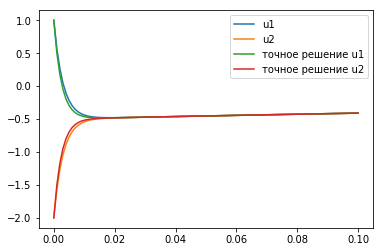

In [10]:
#Эйлер неявный
A = np.array([[p1,p2],[p2,p1]])
A=np.linalg.inv(np.eye(2)-h*A) 

for i in range(N):
        u1[i+1]=u1[i]*A[0,0]+u2[i]*A[0,1]
        u2[i+1]=u1[i]*A[1,0]+u2[i]*A[1,1]
        E2[i]=max([abs(fi1(x[i+1])-u1[i+1]),abs(fi2(x[i+1])-u2[i+1])])
Emax2=max(E2)
        
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,u1, label = 'u1')
plt.plot(x,u2, label = 'u2')
'''plt.plot(x,u1*p1, label = 'u1*p1')
plt.plot(x,u2*p2, label = 'u2*p2')
plt.plot(x,u1*p2, label = 'u1*p2')
plt.plot(x,u2*p1, label = 'u2*p1')'''
q1 = np.zeros(N+1)
for i in range(N+1):                   
    q1[i] = fi1(x[i])
q2 = np.zeros(N+1)
for i in range(N+1):                   
    q2[i] = fi2(x[i])
plt.plot(x, q1, label = 'точное решение u1')
plt.plot(x, q2, label = 'точное решение u2')
#plt.scatter(x, fi1(x))

plt.legend()

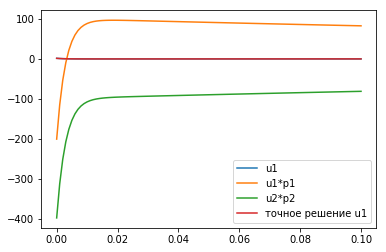

In [11]:
u1
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,u1, label = 'u1')
plt.plot(x,u1*p1, label = 'u1*p1')
plt.plot(x,u2*p2, label = 'u2*p2')
q1 = np.zeros(N+1)
for i in range(N+1):                   
    q1[i] = fi1(x[i])
q2 = np.zeros(N+1)
for i in range(N+1):                   
    q2[i] = fi2(x[i])
plt.plot(x, q1, label = 'точное решение u1')

plt.legend()

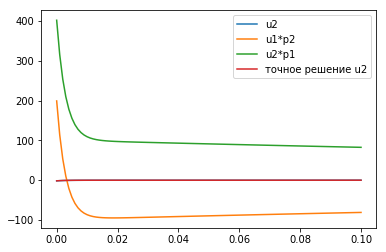

In [12]:
u2
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,u2, label = 'u2')
plt.plot(x,u1*p2, label = 'u1*p2')
plt.plot(x,u2*p1, label = 'u2*p1')
q1 = np.zeros(N+1)
for i in range(N+1):                   
    q1[i] = fi1(x[i])
q2 = np.zeros(N+1)
for i in range(N+1):                   
    q2[i] = fi2(x[i])
plt.plot(x, q2, label = 'точное решение u2')


plt.legend()